<center><h1>A Comprehensive Feature Selection <BR>&<BR>Stacked Ensemble Classifier For Phishing Detection</h1></center>

## Problem Statement<br>
World is moving towards digital transformation and internet services are main pillor of this transformation. People started utilising different internet services like naver before for internet banking, online shopiing which can include food, cloths, eletorcincal items, etc. Such dependability on internet services attracts cyber criminals to perform cyber attack and steal users data.<BR>
**Phishing Attacks** is common type of attacking tool used by cyber criminals. This research propose omptimal wayto identify phishing and legitimate website.

## Objective
- To investigate existing phishing detection technique and their performance.
- To determine important feature using different feature extraction technique.
- To develop stacking classifier prediction model to detect phishing website
- To evaluate and compare performance of predictive models against different feature set and proposed best model

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.max.column', 60)

In [4]:
from IPython.display import display, Markdown
def customprint(text):
    display(Markdown(text))

## Data Load

In [5]:
dataFile = open("Phishing_Legitimate_full.arff")
lstFeatures = [l.split(' ')[1] for l in dataFile if l.startswith('@attribute')]

In [6]:
phish_legitimate_df = pd.read_csv("Phishing_Legitimate_full.arff", header=None, names=lstFeatures, skiprows=53 )
phish_legitimate_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [7]:
phish_legitimate_df.rename(columns={'AbnormalExtFormActionR':'AbnormalExtFormActionRT', 'CLASS_LABEL' : 'Phishing'}, inplace=True)

In [269]:
phish_legitimate_df.sample(10)

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing,SpecialCharInURL
7070,3,1,2,92,0,0,0,0,0,0,4,0,5,1,0,0,0,1,17,19,48,0,0,0,0.000000,0.666667,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,-1,1,0,1
7003,3,1,2,122,12,0,0,0,0,0,0,0,6,1,1,0,0,1,18,97,0,0,0,0,0.064327,0.231579,0,1,0,0,0,0.046784,0,0,0,0,0,1,0,1,1,-1,1,1,0,1,0,1
7208,1,0,3,121,4,0,0,0,3,2,3,0,32,1,0,0,0,1,15,8,90,0,0,0,0.311475,0.224490,0,1,0,1,0,0.000000,0,0,0,0,0,1,0,0,1,-1,1,0,0,0,0,1
1639,4,1,3,47,0,0,0,0,0,0,0,0,0,1,0,0,0,1,18,22,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0
5263,5,0,3,71,0,0,0,0,0,0,0,0,18,1,1,0,0,0,16,48,0,0,0,0,0.157895,0.000000,0,0,0,0,0,0.052632,0,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0
9986,3,1,1,38,1,0,0,0,0,0,0,0,5,1,1,0,0,1,15,16,0,0,0,0,0.011765,0.444444,0,1,1,0,0,0.011765,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,1
4461,2,0,2,78,2,1,0,0,2,0,0,0,3,1,0,0,0,0,27,27,16,0,0,0,0.000000,0.111111,0,1,1,0,1,0.000000,0,0,0,0,0,0,0,0,1,-1,1,-1,1,1,1,1
5613,2,1,8,84,0,0,0,0,0,0,0,0,8,1,1,0,0,1,21,56,0,0,0,0,0.058824,0.072727,0,0,0,0,0,0.000000,0,0,0,0,1,1,0,0,1,-1,1,1,1,1,0,0
4232,2,0,6,61,1,0,0,0,0,0,0,0,2,1,1,0,0,0,10,44,0,0,0,0,1.000000,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,0,-1,1,-1,-1,1,1
6343,1,0,4,98,6,0,0,0,0,0,0,0,18,1,1,0,0,0,11,80,0,0,0,0,0.750000,0.500000,0,0,0,0,0,0.000000,0,0,0,0,1,1,0,0,1,-1,-1,1,0,-1,0,1


In [9]:
phish_legitimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
NumDots                               10000 non-null int64
SubdomainLevel                        10000 non-null int64
PathLevel                             10000 non-null int64
UrlLength                             10000 non-null int64
NumDash                               10000 non-null int64
NumDashInHostname                     10000 non-null int64
AtSymbol                              10000 non-null int64
TildeSymbol                           10000 non-null int64
NumUnderscore                         10000 non-null int64
NumPercent                            10000 non-null int64
NumQueryComponents                    10000 non-null int64
NumAmpersand                          10000 non-null int64
NumHash                               10000 non-null int64
NumNumericChars                       10000 non-null int64
NoHttps                               10000 non-null int64
RandomS

In [10]:
phish_legitimate_df.isnull().sum() 

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


**There is no missing value in current dataset.**

In [11]:
phish_legitimate_df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,

**HttpsInHostname** have all zero, so we can drop this variable.

In [12]:
phish_legitimate_df.drop(columns='HttpsInHostname', axis=0, inplace=True)

In [13]:
#Check for zero vlaues.
phish_legitimate_df.describe(percentiles=[0.1,0.2,0.5,0.7,0.8,0.9,0.95,1])[phish_legitimate_df.describe().columns[phish_legitimate_df.describe().loc['min'] <=0]]

,SubdomainLevel,PathLevel,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.586800,3.300300,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,0.751214,1.863241,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
10%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
20%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
70%,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.00000,0.000000,0.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.221404,0.655342,0.000000,1.000000,0.000000,0.0000,

In [14]:
phish_legitimate_df['SubdomainLevelRT'].value_counts()

 1    9666
 0     234
-1     100
Name: SubdomainLevelRT, dtype: int64

In [15]:
#Check for duplicate observations.
phish_legitimate_df[phish_legitimate_df.duplicated()]

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing
118,2,0,3,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,22,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
128,4,0,4,89,2,0,0,0,0,0,0,0,0,21,1,1,1,0,0,13,34,34,0,2,0,0.000000,0.035714,1,1,0,0,0,0.000000,1,0,0,0,0,1,0,0,1,-1,1,1,1,1,1
132,2,0,8,50,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,12,31,0,0,0,0,1.000000,0.142857,1,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,1,1,0,-1,1
133,2,0,8,50,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,12,31,0,0,0,0,1.000000,0.142857,1,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,1,1,0,-1,1
144,1,0,4,59,0,0,0,0,0,0,0,0,0,22,1,1,0,0,1,12,40,0,0,0,0,0.000000,0.125000,0,1,1,0,0,0.923077,0,0,0,0,0,0,0,0,1,0,1,1,1,-1,1
162,2,0,3,42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13,22,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
180,1,0,3,37,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16,14,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
248,1,0,2,29,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,5,0,0,0,0,1.000000,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,-1,1,-1,-1,1
264,2,0,2,39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,17,15,0,0,0,0,1.000000,1.000000,0,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,-1,1,-1,-1,1
300,3,1,8,54,1,1,0,0,0,0,0,0,0,2,1,0,0,0,0,16,31,0,0,0,0,1.000000,0.142857,1,1,0,0,0,0.000000,0,0,0,0,0,1,0,0,1,0,1,1,0,-1,1


In [16]:
#Verify Derived column values based on defined threshold
count = phish_legitimate_df['SubdomainLevel']
cat = phish_legitimate_df['SubdomainLevelRT']
rule_legitimate = ((count <= 1) & (cat != 1))
rule_suspicious = ((count == 2) & (cat != 0))
rule_phishing = ((count > 2) & (cat != -1))
phish_legitimate_df[(rule_legitimate | rule_suspicious | rule_phishing)][['SubdomainLevel', 'SubdomainLevelRT']]

,SubdomainLevel,SubdomainLevelRT
135,2,1
566,2,1
592,2,1
733,2,1
872,3,0
873,3,0
930,2,1
1043,2,1
1049,2,1
1225,2,1


In [17]:
#Verify Derived column values based on defined threshold
count = phish_legitimate_df['UrlLength']
cat = phish_legitimate_df['UrlLengthRT']
rule_legitimate = ((count < 54) & (cat != 1))
rule_suspicious = ((count <= 54)& (count >= 75) & (cat != 0))
rule_phishing = ((count > 75) & (cat != -1))
phish_legitimate_df[(rule_legitimate | rule_suspicious | rule_phishing)][['UrlLength', 'UrlLengthRT']]

,UrlLength,UrlLengthRT


In [18]:
#Verify Derived column values based on defined threshold
count = phish_legitimate_df['PctExtResourceUrls']
cat = phish_legitimate_df['PctExtResourceUrlsRT']
rule_legitimate = ((count < 0.22) & (cat != 1))
rule_suspicious = ((count <= 0.22)& (count >= 0.61) & (cat != 0))
rule_phishing = ((count > 0.61) & (cat != -1))
phish_legitimate_df[(rule_legitimate | rule_suspicious | rule_phishing)][['PctExtResourceUrls', 'PctExtResourceUrlsRT']]

,PctExtResourceUrls,PctExtResourceUrlsRT
5,1.000000,1
6,1.000000,1
9,1.000000,1
38,1.000000,1
39,1.000000,1
45,0.675676,0
93,0.625000,0
107,1.000000,1
120,1.000000,1
170,1.000000,1


In [19]:
phish_legitimate_df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing
0,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,21,44,0,0,0,0,0.000,0.250000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,17,16,103,0,1,0,0.000,0.000000,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,27,24,0,0,0,0,0.375,1.000000,1,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,22,50,0,0,0,1,1.000,0.095238,1,1,0,0,0,0.0,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,10,29,0,0,0,0,1.000,1.000000,0,0,0,1,0,0.0,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1


In [20]:
phish_legitimate_df[phish_legitimate_df.duplicated()].shape

(419, 48)

In [21]:
phish_legitimate_df[phish_legitimate_df.drop(columns=['Phishing']).duplicated()].shape

(419, 48)

There are **419** duplicate rows identified.<BR>
These duplicate data will increase the biasness in model and model will overfit on such subset of data.<BR>
Let's remove dupulicate data.

In [22]:
phish_legitimate_df = phish_legitimate_df[~phish_legitimate_df.duplicated()]
phish_legitimate_df.shape

(9581, 48)

In [23]:
#Check Class Imbalance
phish_legitimate_df['Phishing'].value_counts() / phish_legitimate_df.shape[0] * 100

0    52.14487
1    47.85513
Name: Phishing, dtype: float64

Dataset contanis 52.14% of legitimate websites whereas 47.85% of phishing website.

In [24]:
phish_legitimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9581 entries, 0 to 9999
Data columns (total 48 columns):
NumDots                               9581 non-null int64
SubdomainLevel                        9581 non-null int64
PathLevel                             9581 non-null int64
UrlLength                             9581 non-null int64
NumDash                               9581 non-null int64
NumDashInHostname                     9581 non-null int64
AtSymbol                              9581 non-null int64
TildeSymbol                           9581 non-null int64
NumUnderscore                         9581 non-null int64
NumPercent                            9581 non-null int64
NumQueryComponents                    9581 non-null int64
NumAmpersand                          9581 non-null int64
NumHash                               9581 non-null int64
NumNumericChars                       9581 non-null int64
NoHttps                               9581 non-null int64
RandomString           

**Derived Variable**

In [25]:
#Based on special charachter count will devrive one boolean variable which indicate special cahr exists in URL or not
phish_legitimate_df["SpecialCharInURL"] =  phish_legitimate_df.apply(lambda x : 1 if (x['NumDash'] > 0) 
                                                                     | (x['AtSymbol'] > 0)
                                                                     | (x['TildeSymbol'] > 0)
                                                                     | (x['NumUnderscore'] > 0)
                                                                     | (x['NumPercent'] > 0)
                                                                     | (x['NumAmpersand'] > 0)
                                                                     | (x['NumHash'] > 0)
                                                                     | (x['NumHash'] > 0)
                                                                     else 0, axis = 1)

In [26]:
phish_legitimate_df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionRT,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Phishing,SpecialCharInURL
count,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.00000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000,9581.000000
mean,2.428974,0.570817,3.267509,69.993946,1.844171,0.118568,0.000313,0.012107,0.334829,0.076506,0.473228,0.285043,0.002296,5.522075,0.989771,0.518213,0.016491,0.016178,0.429496,18.566955,35.408726,8.746164,0.000939,0.104373,0.056048,0.238154,0.396996,0.168145,0.839683,0.247886,0.104791,0.059910,0.127095,0.211460,0.005741,0.009185,0.005114,0.133702,0.33890,0.031208,0.030268,0.964096,0.024528,0.341300,0.786035,0.164492,0.342762,0.478551,0.627074
std,1.335516,0.720357,1.852927,33.097013,3.147228,0.484553,0.017693,0.109371,1.135215,0.635002,1.366020,1.128144,0.047866,9.279237,0.100623,0.499694,0.127361,0.126166,0.495030,7.570630,24.571016,24.412210,0.030636,0.355045,0.230027,0.337524,0.385879,0.374015,0.366919,0.431808,0.306300,0.237333,0.301235,0.408365,0.075552,0.095401,0.071335,0.340350,0.47336,0.173887,0.171333,0.225153,0.820995,0.891502,0.529049,0.751530,0.885535,0.499566,0.483608
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,17.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.075163,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,4.000000,83.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,22.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.785714,0.000000,1.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,1.000000,1.000

In [27]:
#sns.pairplot(data=phish_legitimate_df[webpageFeatures])

## EDA

### Univariate & Bivariate Analysis

In [28]:
def PlotNumericalFeatures(df, col):
    customprint('**' + col + '**')
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(18, 4))
    
    #Plot All Records
    ax = sns.distplot(df[col], ax = axes[0])
    ax.set_title(col)
    
    #Plot Only Non Defaulters
    ax = sns.distplot(df[df['Phishing']==0][col],ax = axes[1])
    ax.set_title('Legitimate')
    
    #Plot Only Defaulters
    ax = sns.distplot(df[df['Phishing']==1][col], ax = axes[2])
    ax.set_title('Phishing')

    #Plot Defaulter vs Non-defaulter
    ax = sns.boxplot(x='Phishing', y=col, data=df, ax = axes[3])
    ax = sns.stripplot(x='Phishing', y=col, data=df, jitter=True, ax = axes[3])
    ax.set_title('Legitimate Vs Phishing')
    plt.show()

In [29]:
def PlotCategoricalFeatures(df, col, graphSize =(15,6), bbox=[0, 0, 2.5, 0.9]):
    customprint('**' + col + '**')
    No_of_Sites = df.groupby(col)['Phishing'].count().reset_index(name = 'Total Sites')
    No_of_PhishingSites = df[df['Phishing']==1].groupby(col)['Phishing'].count().reset_index(name = 'No of Phishing Sites')
    tempDf = No_of_Sites.merge(No_of_PhishingSites, how='left', on=col)
    tempDf['No of Phishing Sites'].fillna(0, inplace=True)
    tempDf['% Phishing in Category'] = round(100*(tempDf['No of Phishing Sites']/tempDf['Total Sites']), 2)
    tempDf['% Sites in Category'] = round(100*(tempDf['Total Sites']/df.index.size), 2)
    tempDf[col] = tempDf[col].astype('category')
    fig = plt.figure(figsize= graphSize)
    
    colOrder = sorted(df[col].unique())
    ax = fig.add_subplot(121)
    sns.barplot(data=tempDf, x=col, y='% Sites in Category', ax=ax, order=colOrder, )
    for i, v in enumerate(tempDf['% Sites in Category']):
        ax.text(i - 0.1, v +0.5, str(v), color='blue', fontweight='bold')
        
    ax.set_title(col.capitalize(), fontsize=14)

    ax = fig.add_subplot(122)
    sns.barplot(data=tempDf, x=col, y='% Phishing in Category', ax=ax, order=colOrder)
    for i, v in enumerate(tempDf['% Phishing in Category']):
        ax.text(i - 0.1, v +0.5, str(v), color='blue', fontweight='bold')
        
    ax.set_title(col.capitalize() + " Vs Phishing Sites", fontsize=14)
    #ax.set_ylabel("")
    #ax.set_yticklabels("")

    plt.show()
    return

In [30]:
#Logically divide numberical and categorical values 
numericalFeatures = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
        'NumDashInHostname', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 
        'NumNumericChars', 'HostnameLength', 'PathLength', 'QueryLength', 
        'PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks']

categoricalFeatures = ['AtSymbol','TildeSymbol','NumHash','NoHttps','RandomString', 'IpAddress', 'NumSensitiveWords', 
        'DomainInSubdomains', 'DomainInPaths', 'DoubleSlashInPath','EmbeddedBrandName', 'SpecialCharInURL',
        'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
        'FrequentDomainNameMismatch','FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
        'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
        'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
        'PctExtResourceUrlsRT', 'AbnormalExtFormActionRT',
        'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']

**NumDots**

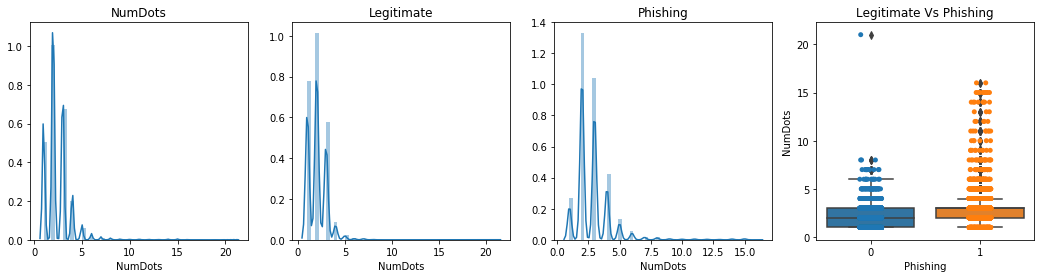

**SubdomainLevel**

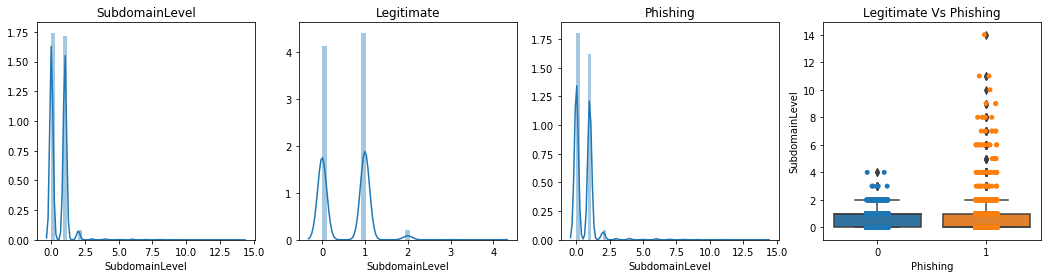

**PathLevel**

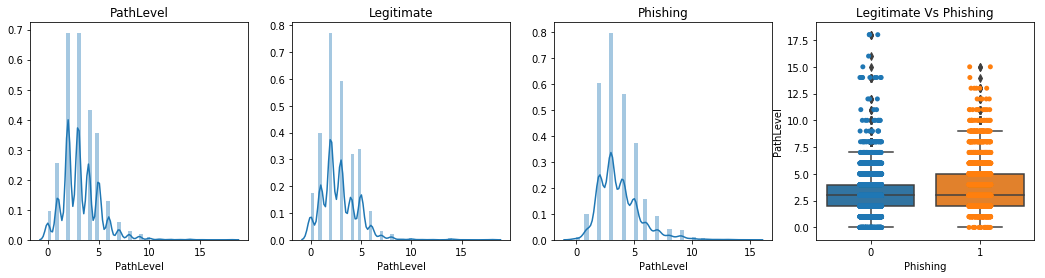

**UrlLength**

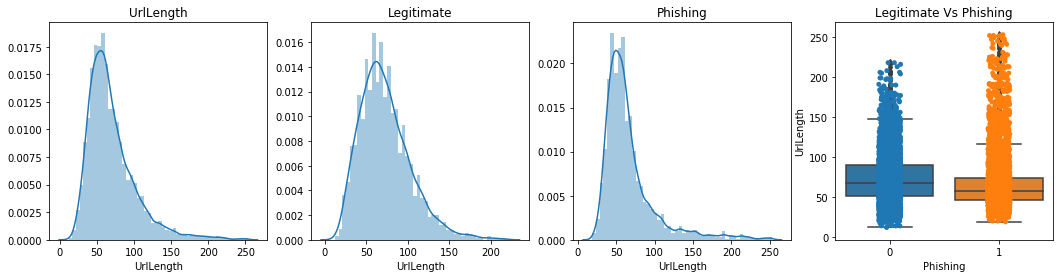

**NumDash**

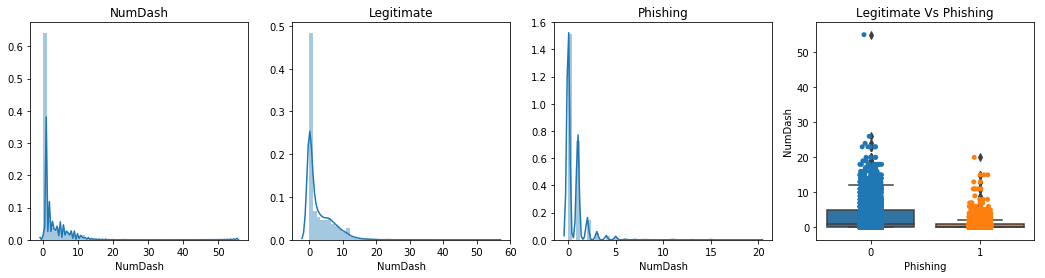

**NumDashInHostname**

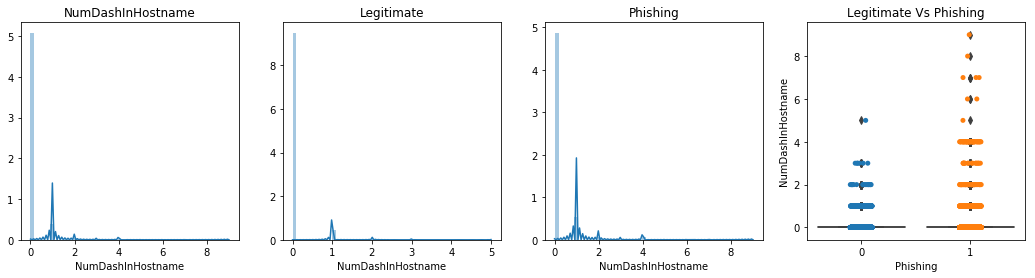

**NumUnderscore**

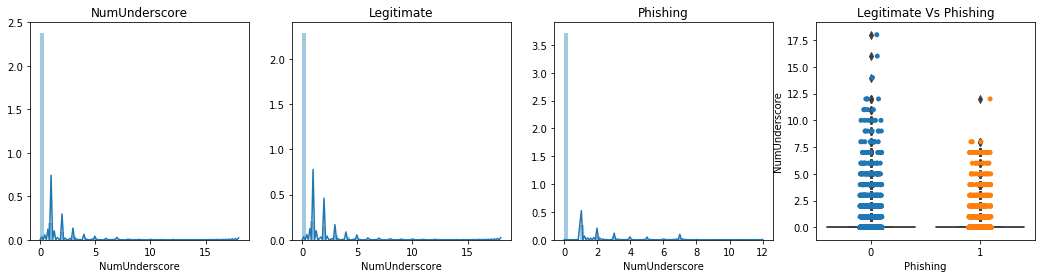

**NumPercent**

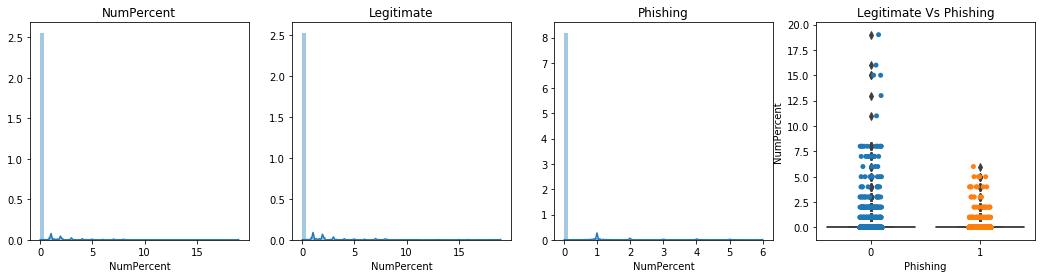

**NumQueryComponents**

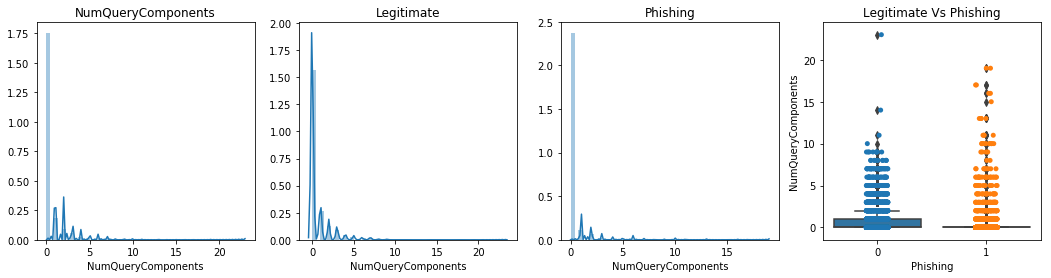

**NumAmpersand**

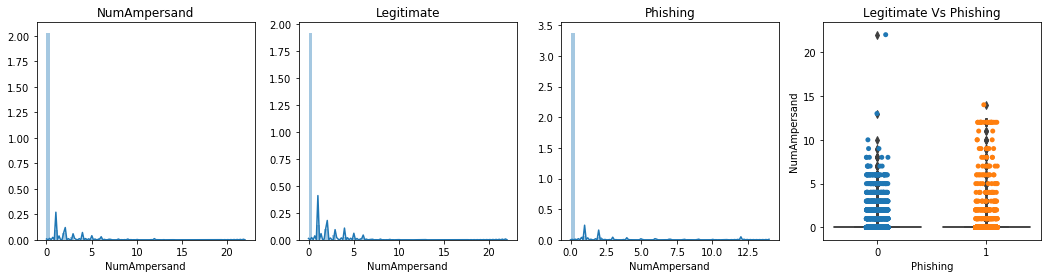

**NumNumericChars**

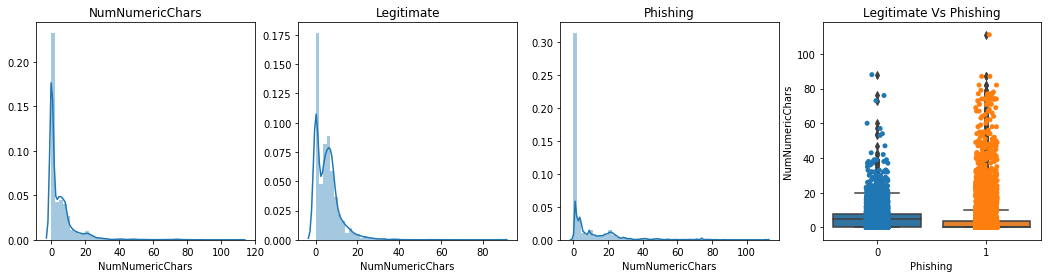

**HostnameLength**

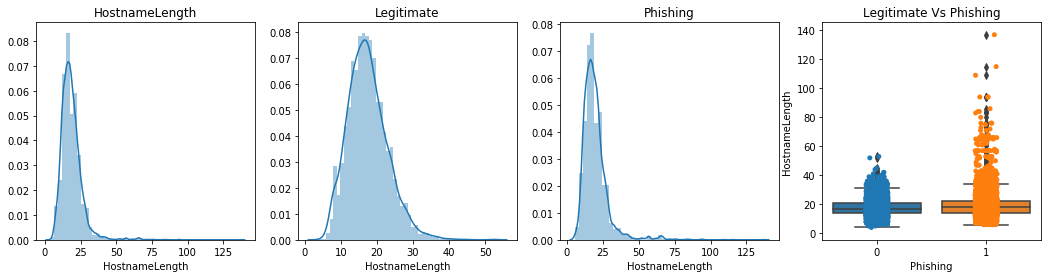

**PathLength**

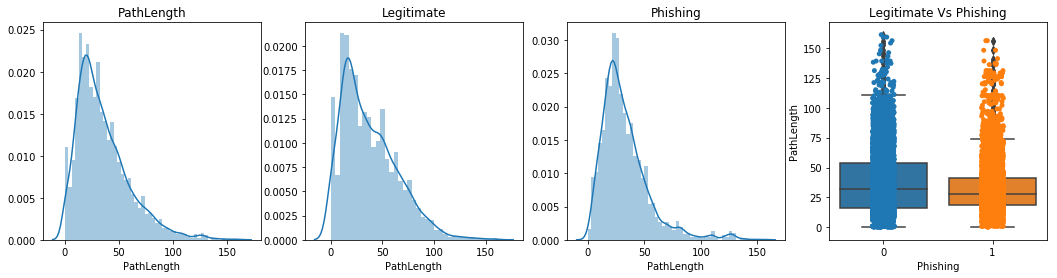

**QueryLength**

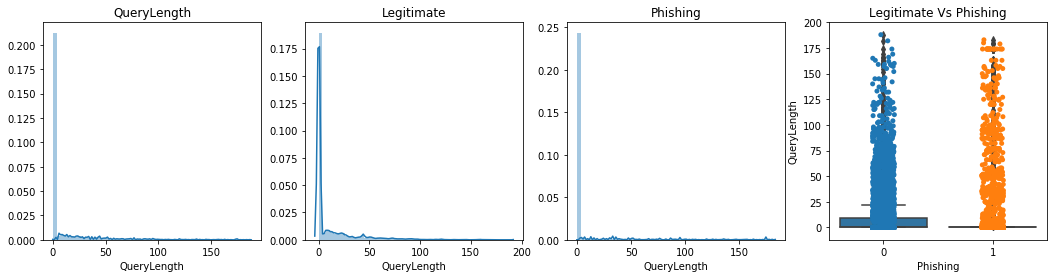

**PctExtHyperlinks**

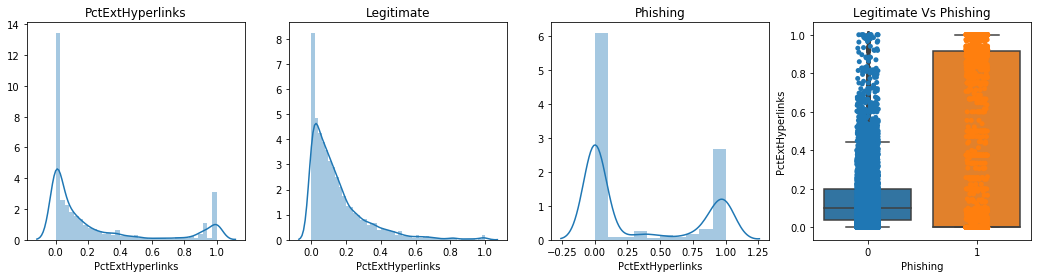

**PctExtResourceUrls**

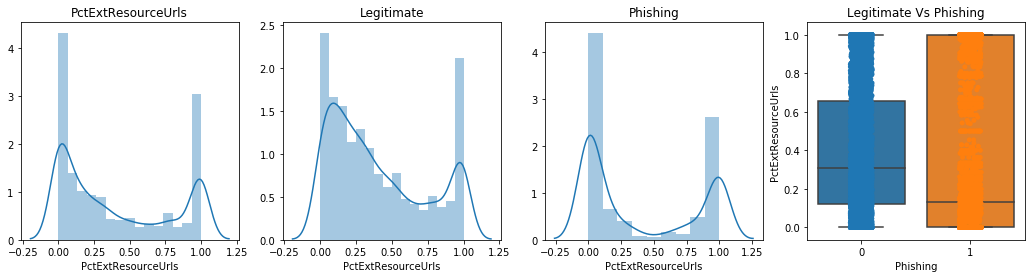

**PctNullSelfRedirectHyperlinks**

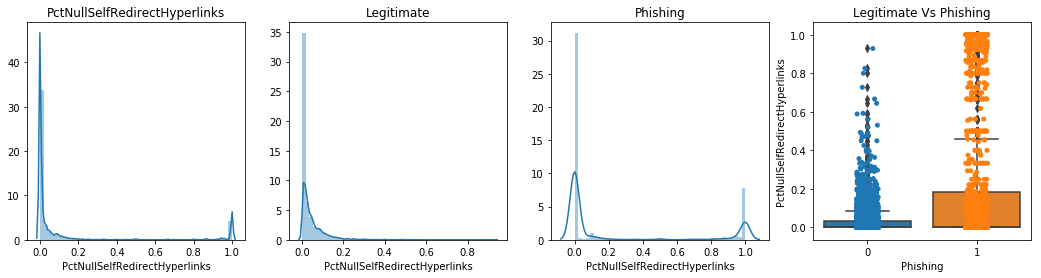

In [31]:
for f in numericalFeatures:
    PlotNumericalFeatures(phish_legitimate_df, f)

**AtSymbol**

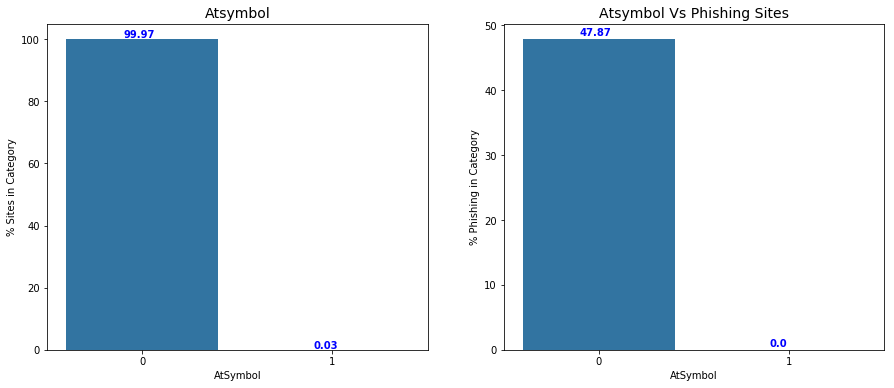

**TildeSymbol**

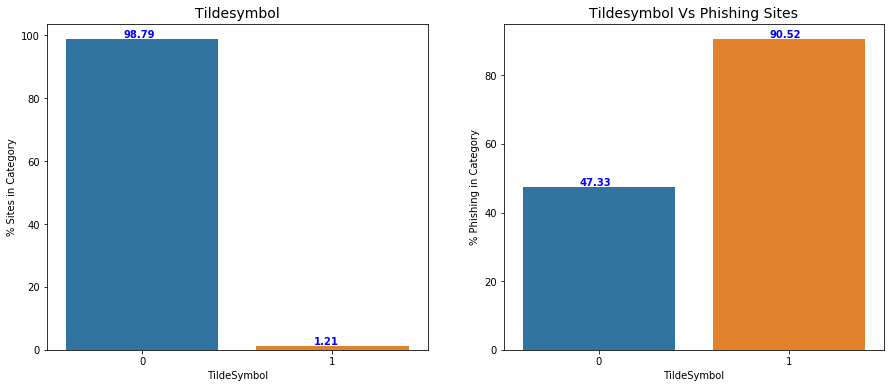

**NumHash**

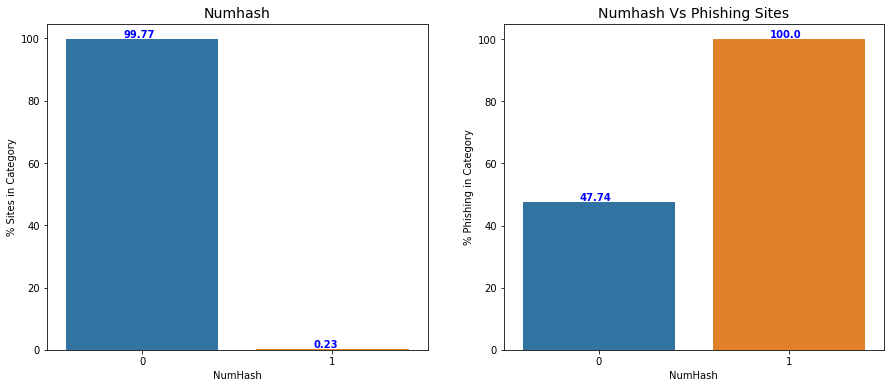

**NoHttps**

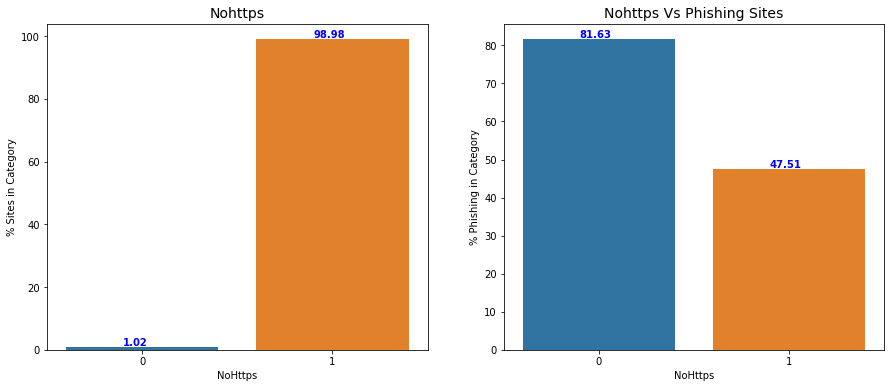

**RandomString**

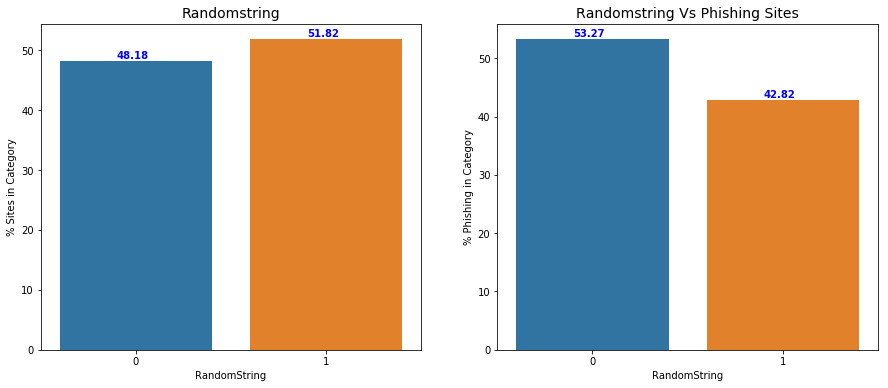

**IpAddress**

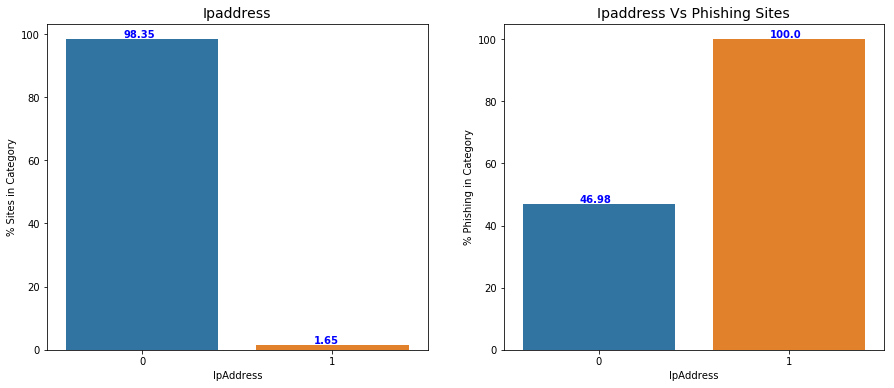

**NumSensitiveWords**

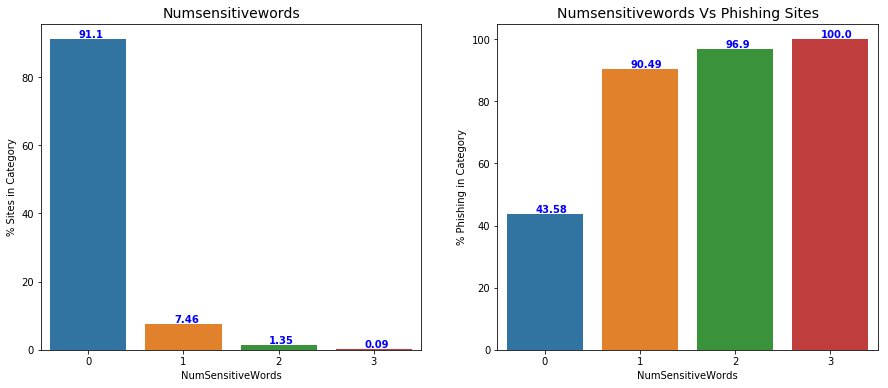

**DomainInSubdomains**

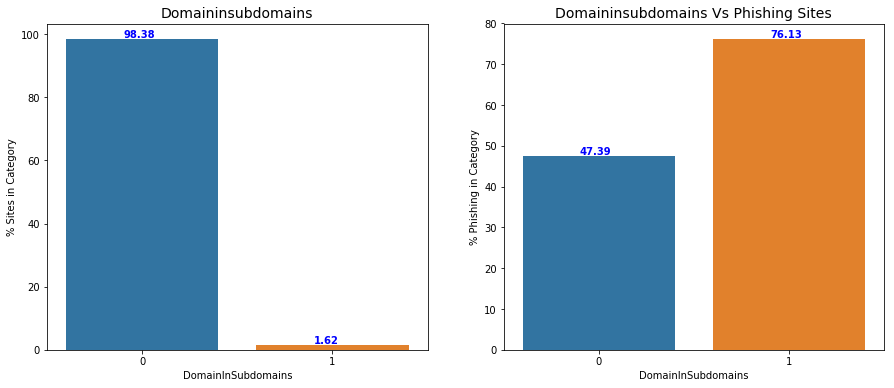

**DomainInPaths**

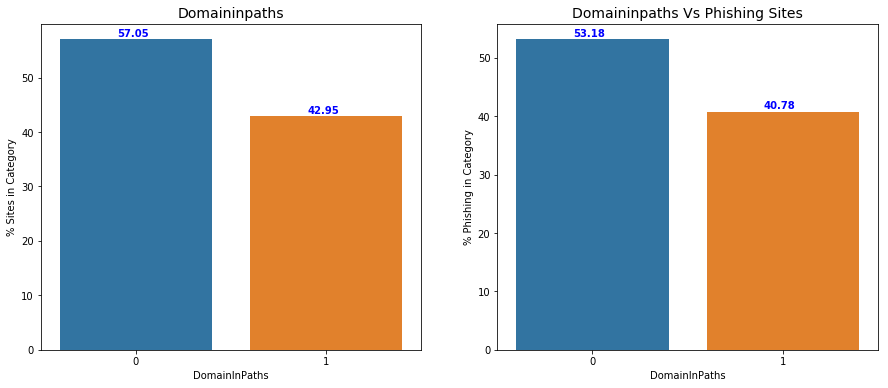

**DoubleSlashInPath**

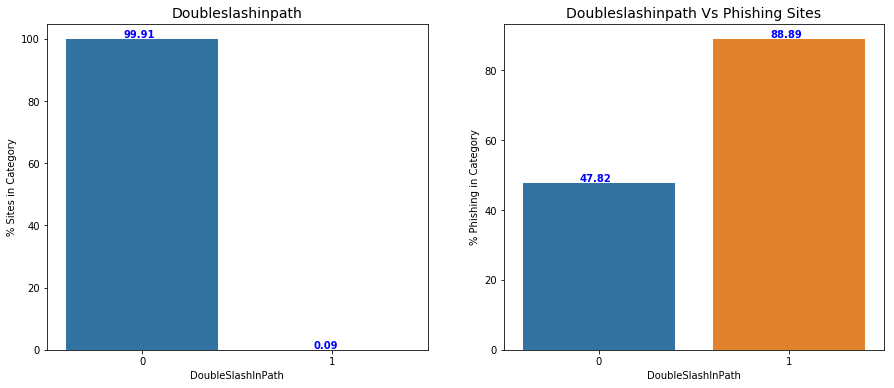

**EmbeddedBrandName**

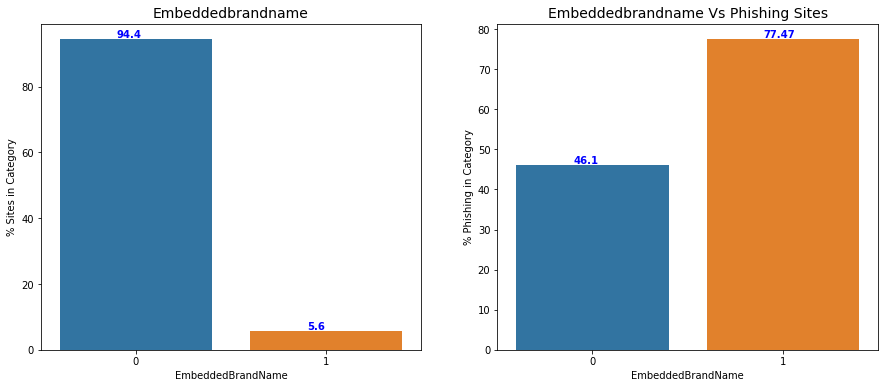

**SpecialCharInURL**

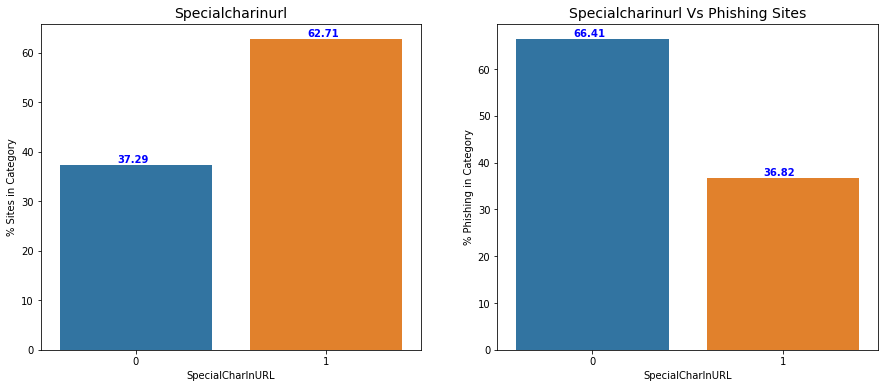

**ExtFavicon**

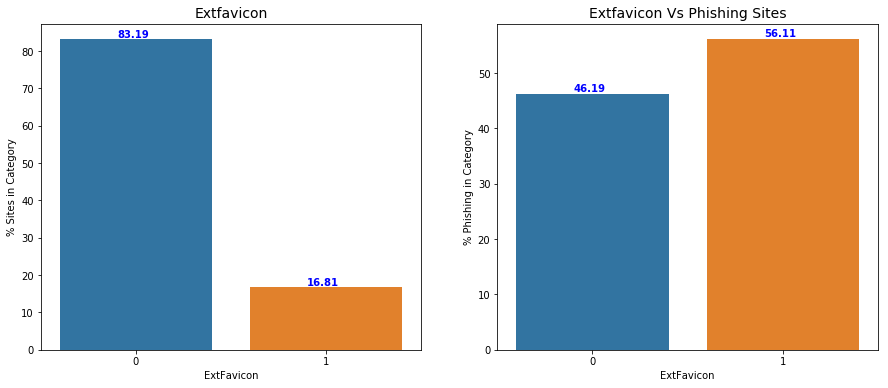

**InsecureForms**

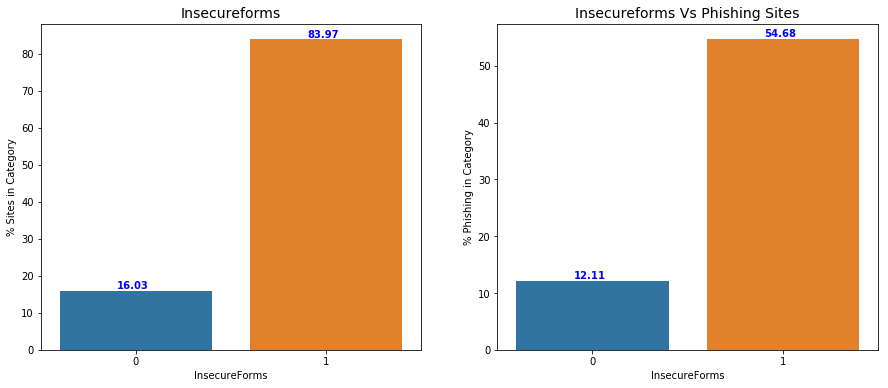

**RelativeFormAction**

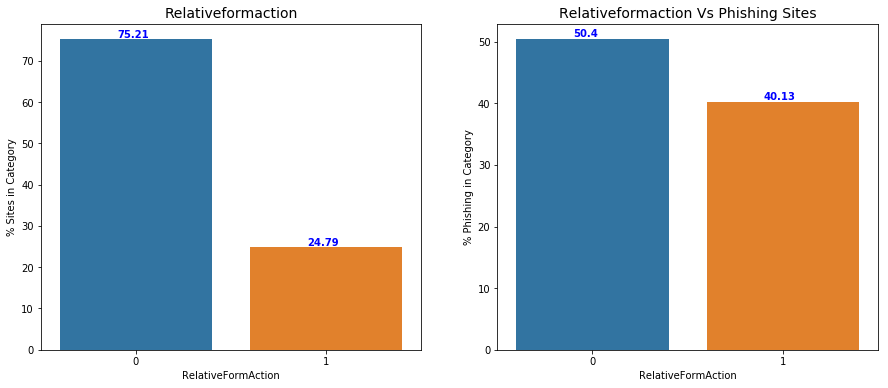

**ExtFormAction**

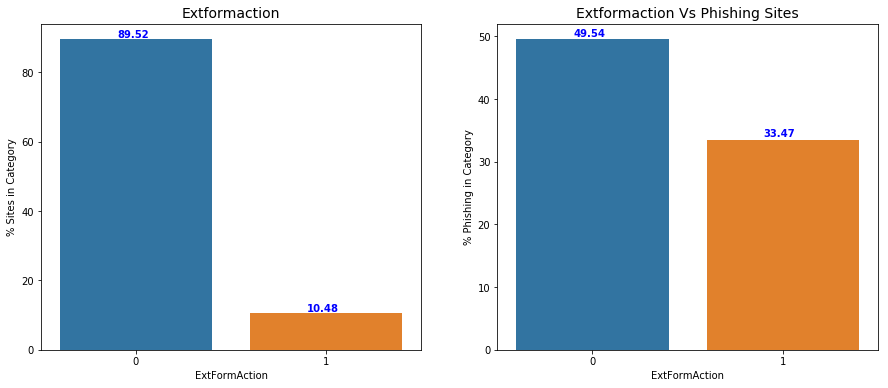

**AbnormalFormAction**

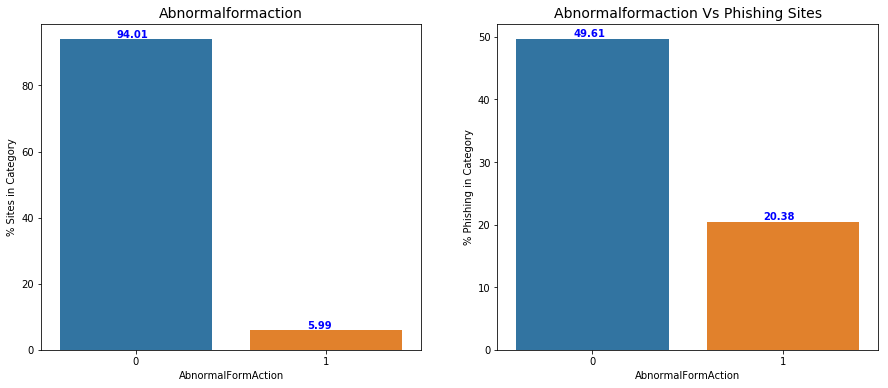

**FrequentDomainNameMismatch**

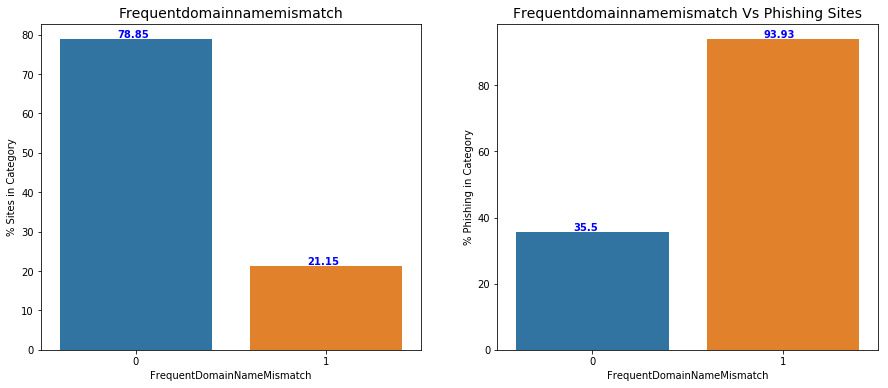

**FakeLinkInStatusBar**

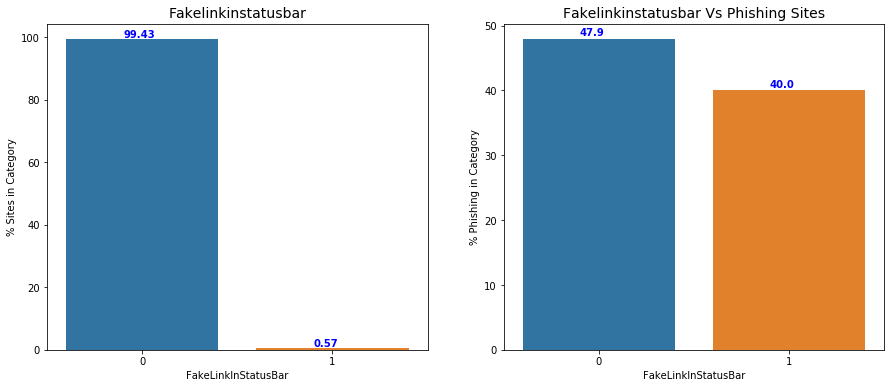

**RightClickDisabled**

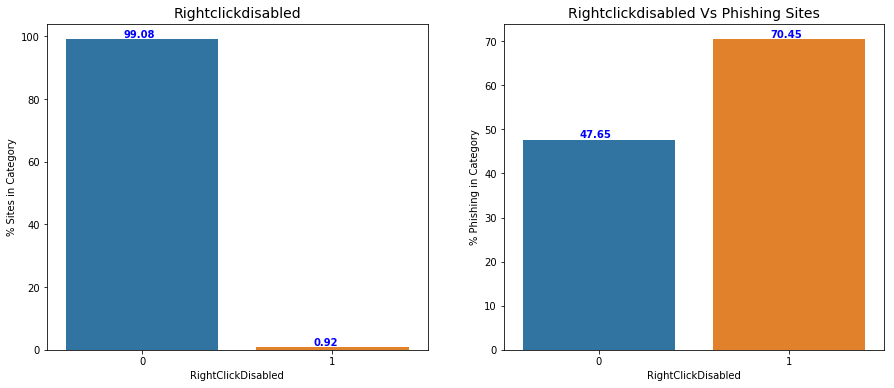

**PopUpWindow**

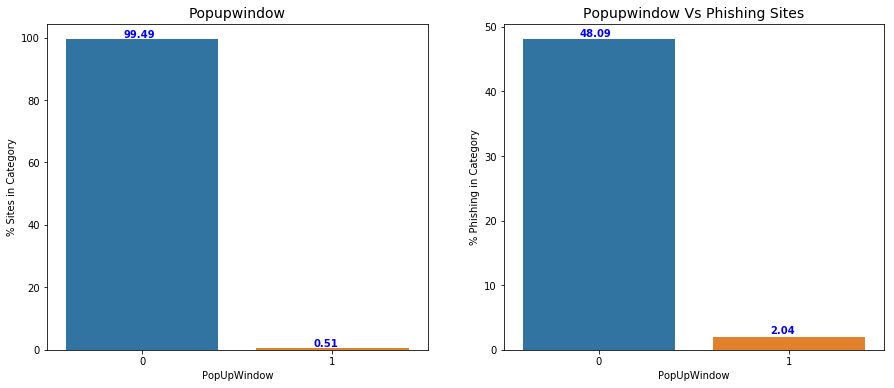

**SubmitInfoToEmail**

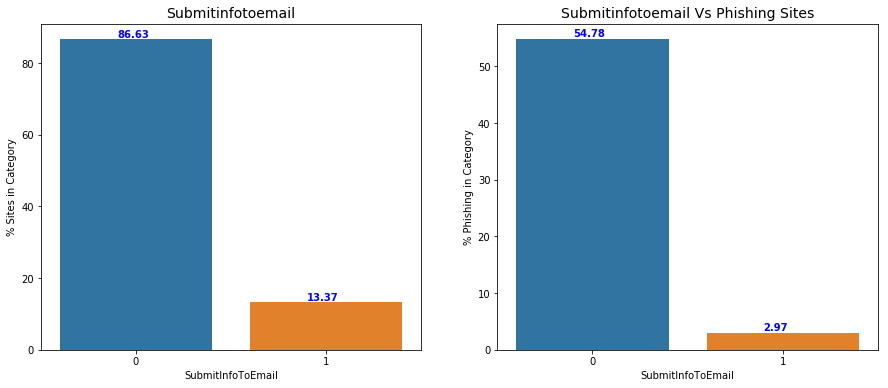

**IframeOrFrame**

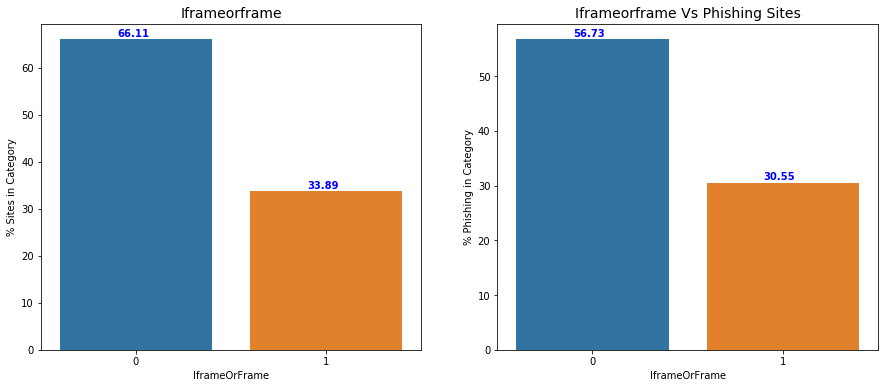

**MissingTitle**

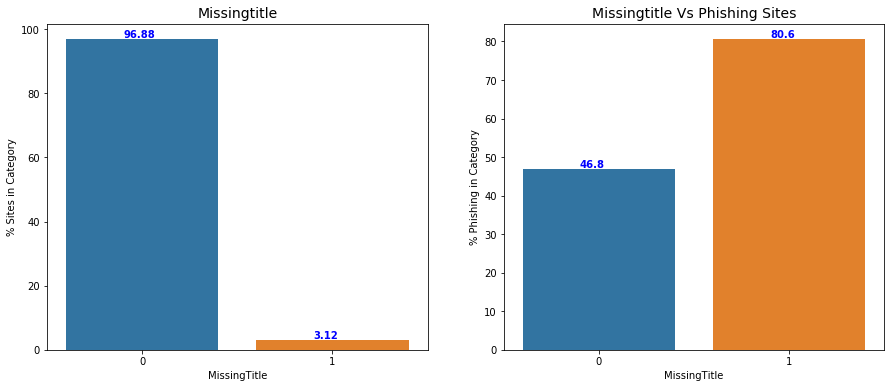

**ImagesOnlyInForm**

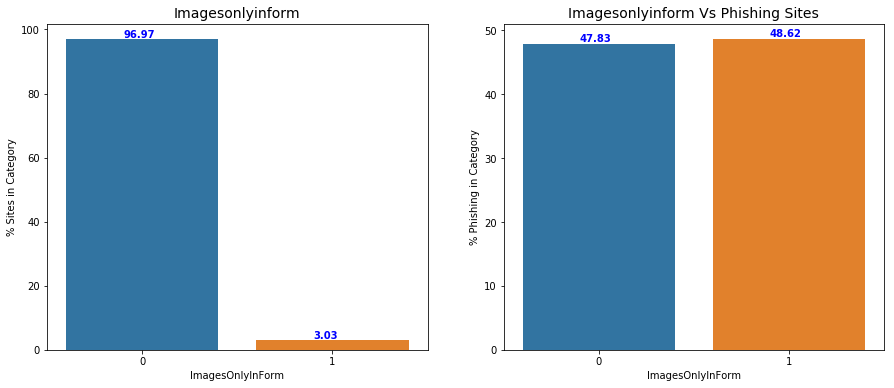

**SubdomainLevelRT**

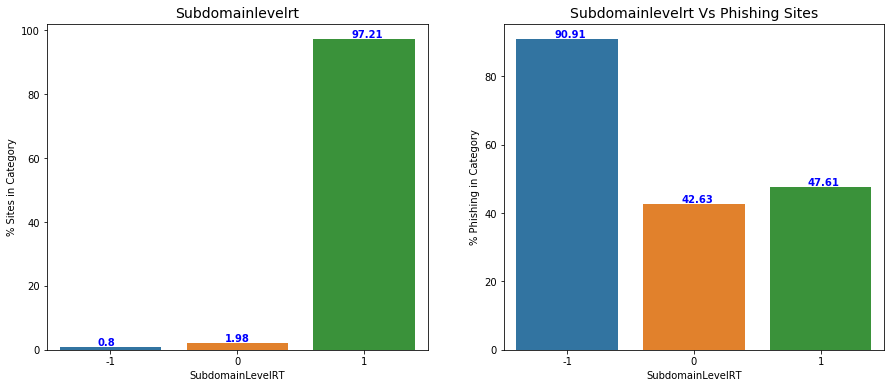

**UrlLengthRT**

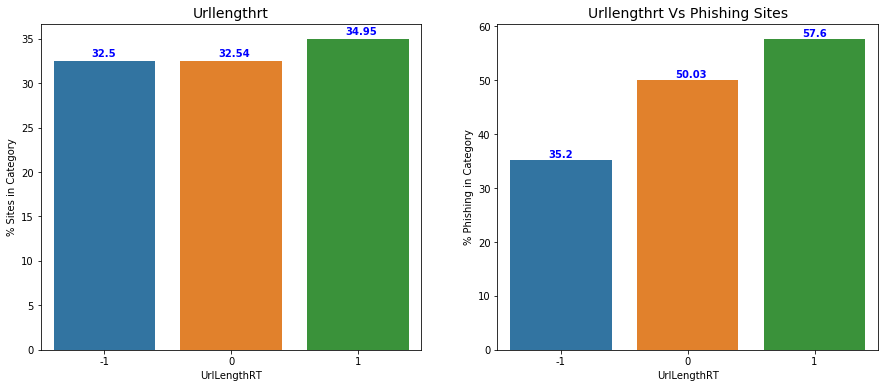

**PctExtResourceUrlsRT**

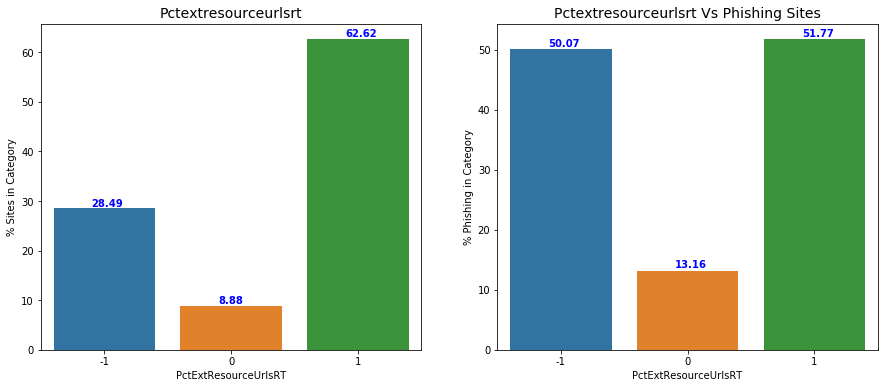

**AbnormalExtFormActionRT**

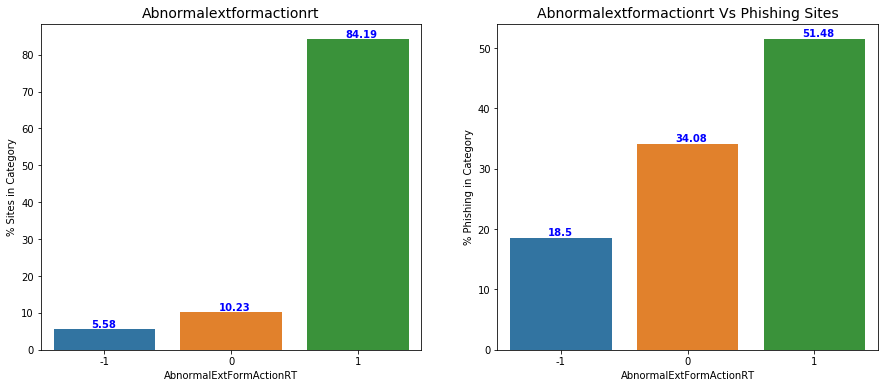

**ExtMetaScriptLinkRT**

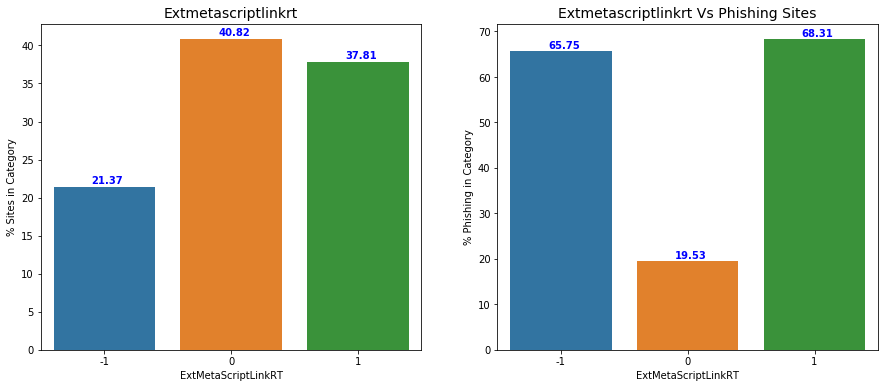

**PctExtNullSelfRedirectHyperlinksRT**

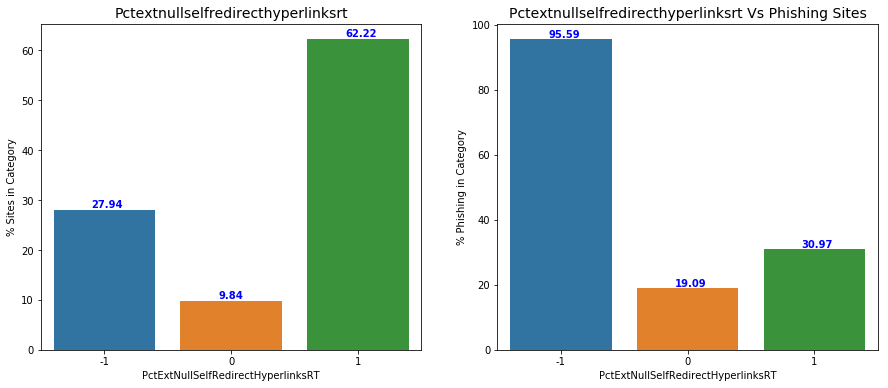

In [32]:
for f in categoricalFeatures:
    PlotCategoricalFeatures(phish_legitimate_df, f)

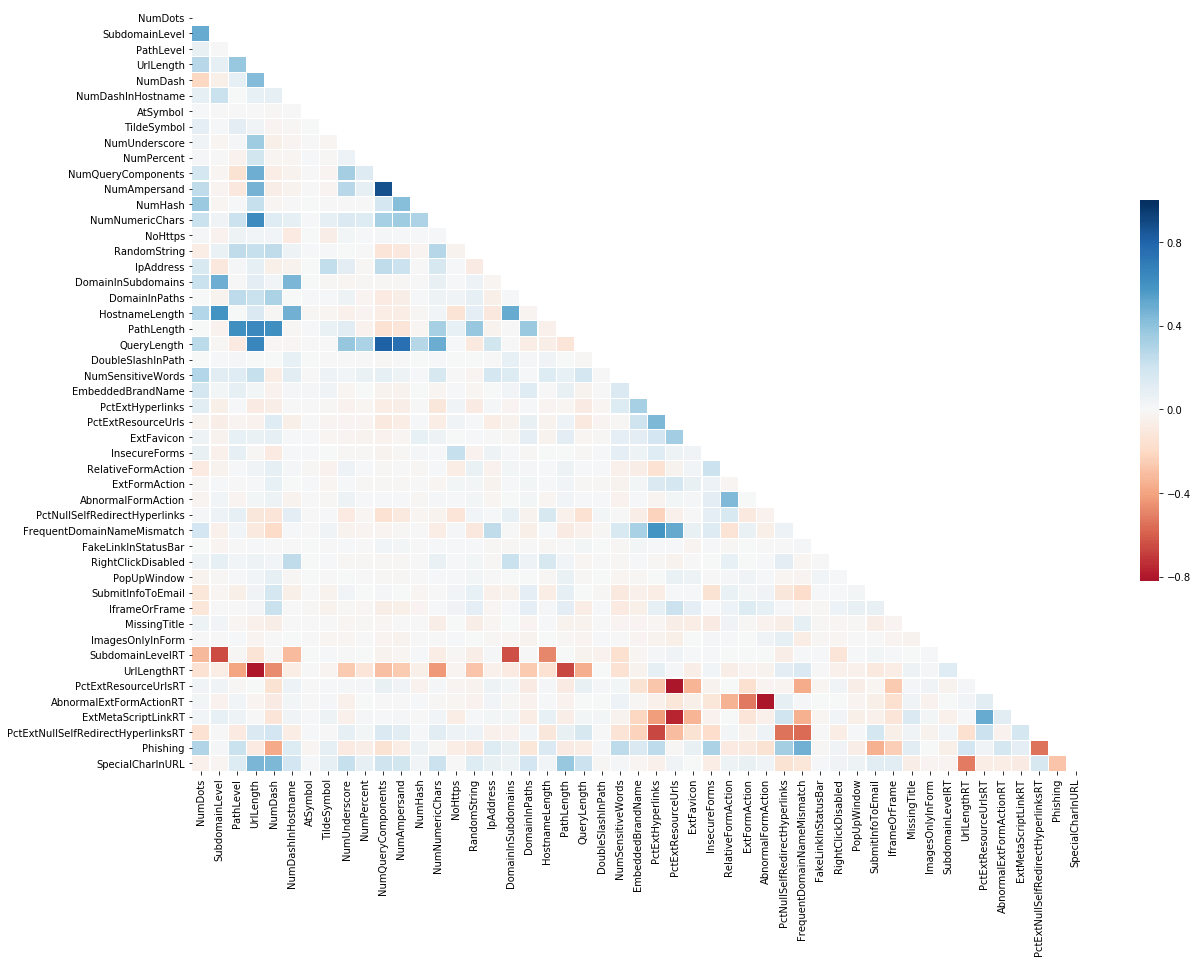

In [33]:
#Check correlation with heatmap
corrData = phish_legitimate_df.corr()
plt.figure(figsize=(20,14))
mask = np.zeros_like(corrData, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrData, cmap='RdBu', mask=mask, center=0, linewidths= 0.1, cbar_kws={"shrink": 0.5})
plt.show()

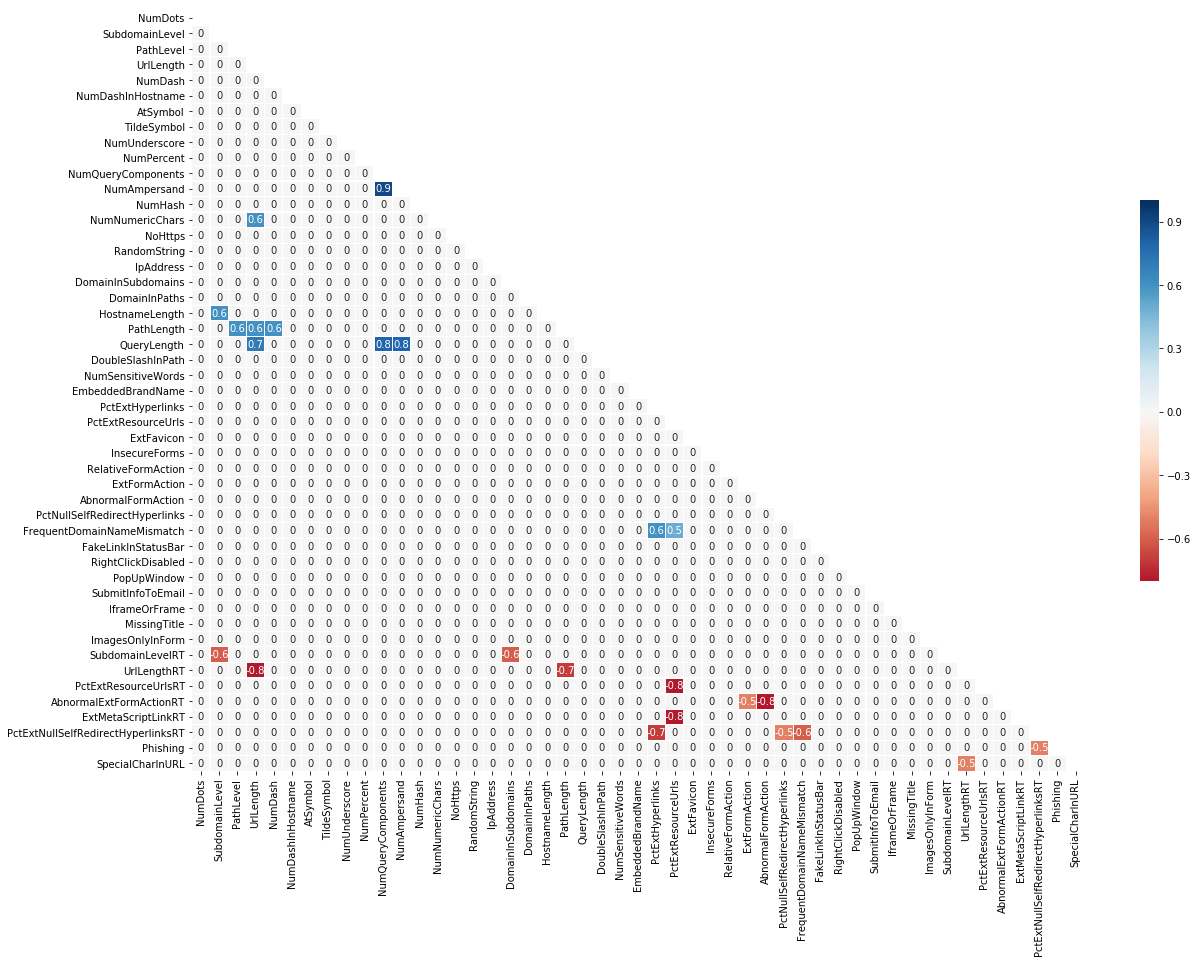

In [34]:
#Check correlation with heatmap
#Display data with high correlation only

corrData = round(phish_legitimate_df.corr().applymap(lambda x : 0 if x > -0.5 and x < 0.5 else x ), 1)
plt.figure(figsize=(20,14))
mask = np.zeros_like(corrData, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrData, cmap='RdBu', mask=mask,annot=True, center=0, linewidths= 0.1, cbar_kws={"shrink": 0.5})
plt.show()

**Feature Selection based on Correlation Matrix**
Will check which two independent features are highly corelated (> 85 %) and remove one of them based on correlation with dependent feature. 
<ul>
<li>**NumQueryComponents & QueryLength (0.8)** also **NumQueryComponents & NumAmpersand (0.9) :** These features are highly correlated. So we will remove **NumQueryComponents**.</li>
</ul>


In [35]:
phish_legitimate_df.drop(columns=['NumQueryComponents'], axis=1, inplace=True)

In [341]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from skrebate import ReliefF
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [38]:
def GetVIFScore(df):
    vifScore = pd.DataFrame()
    vifScore['Features'] = df.columns
    vifScore['VIF'] = [round(variance_inflation_factor(df.values, i), 2) for i in range(df.shape[1])]
    vifScore = vifScore.sort_values(by = "VIF", ascending = False)
    return vifScore

In [294]:
def EvaluateModel(model, model_data, y_actual, threshold, predict_proba = True, display = False):
    pred = model.predict_proba(model_data)[:,1]
        
    pred = pred.values if isinstance(pred, pd.Series) == True else pred
    y_actual = y_actual if isinstance(y_actual, np.ndarray) == True else y_actual.values
    
    pred_df = pd.DataFrame(data= {'Phished' : y_actual, 'Phished_Prob':pred.reshape(-1)})

    #pred_df['Phished_Prob'] = round(pred_df['Phished_Prob'] * 100,2)
    threshold = threshold / 100
    if predict_proba:
        pred_df['Prediction'] = pred_df['Phished_Prob'].apply(lambda x: 1 if x >= threshold else 0)
    else:
        pred_df['Prediction'] = model.predict(model_data)
        
    pred_df = pred_df.sort_values(by='Phished_Prob', ascending=False)

    accuracy = round(accuracy_score(pred_df['Phished'], pred_df['Prediction'] ), 2)
    precision= precision_score(pred_df['Phished'], pred_df['Prediction'])
    recall= recall_score(pred_df['Phished'], pred_df['Prediction'])
    
    precision = round(precision,2)    
    recall = round(recall, 2)    
    auc = round(roc_auc_score(pred_df['Phished'], pred_df['Prediction'] ), 2)
    
    if display:
        print("********* " , threshold, " ***********")
        print("Accuracy : ", accuracy)
        print("Sensitivity / Recall : ", recall)
        print("Precision : ", precision )
        print("ROC - AUC : ", auc)
        return pred_df
    else:
        return (accuracy, precision, recall, auc, pred_df)

In [355]:
def PlotScore(data, x):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    ax1 = sns.lineplot(data=data[data['DataSet'] == 'Train'], x=x, y='Accuracy' )
    sns.lineplot(data=data[data['DataSet'] == 'Train'], x=x, y='AUC')
    sns.lineplot(data=data[data['DataSet'] == 'Train'], x=x, y='Precision')
    sns.lineplot(data=data[data['DataSet'] == 'Train'], x=x, y='Recall')
    plt.grid(linestyle='-', linewidth = 0.5)
    plt.legend(['Accuracy','AUC','Precision','Recall'], loc=4)
    ax1.set_title('Train Set')
    ax1.set_ylabel('Percent')
    
    plt.subplot(1,2,2)
    ax2=sns.lineplot(data=data[data['DataSet'] == 'Test'], x=x, y='Accuracy', )
    sns.lineplot(data=data[data['DataSet'] == 'Test'], x=x, y='AUC')
    sns.lineplot(data=data[data['DataSet'] == 'Test'], x=x, y='Precision')
    sns.lineplot(data=data[data['DataSet'] == 'Test'], x=x, y='Recall', )
    plt.grid(linestyle='-', linewidth = 0.5)
    plt.legend(['Accuracy','AUC','Precision','Recall'], loc=4)
    ax2.set_title('Test Set')
    ax2.set_ylabel('Percent')

    plt.show()

In [249]:
df = phish_legitimate_df.copy()

In [270]:
GetVIFScore(df)

,Features,VIF
1,Default_Prob,60.58
2,Prediction,47.37
0,Defaulted,11.82


In [44]:
df.drop(columns=['UrlLength'], axis=1, inplace=True)
GetVIFScore(df)

,Features,VIF
12,NoHttps,75.27
42,AbnormalExtFormActionRT,45.82
39,SubdomainLevelRT,36.84
44,PctExtNullSelfRedirectHyperlinksRT,24.33
23,PctExtHyperlinks,23.73
18,PathLength,21.77
17,HostnameLength,15.63
24,PctExtResourceUrls,14.04
30,PctNullSelfRedirectHyperlinks,13.92
29,AbnormalFormAction,11.53


In [45]:
df.drop(columns=['NoHttps'], axis=1, inplace=True)
GetVIFScore(df)

,Features,VIF
41,AbnormalExtFormActionRT,39.19
38,SubdomainLevelRT,33.96
43,PctExtNullSelfRedirectHyperlinksRT,22.46
22,PctExtHyperlinks,22.22
17,PathLength,21.61
16,HostnameLength,15.50
23,PctExtResourceUrls,13.79
29,PctNullSelfRedirectHyperlinks,13.14
0,NumDots,10.75
28,AbnormalFormAction,10.05


In [48]:
df.drop(columns=['AbnormalExtFormActionRT'], axis=1, inplace=True)
GetVIFScore(df)

,Features,VIF
21,PctExtHyperlinks,15.67
40,PctExtNullSelfRedirectHyperlinksRT,14.73
16,HostnameLength,13.66
22,PctExtResourceUrls,13.00
0,NumDots,9.84
28,PctNullSelfRedirectHyperlinks,9.32
24,InsecureForms,7.66
2,PathLevel,6.35
41,Phishing,5.83
17,QueryLength,4.47


In [ ]:
df.drop(columns=['SubdomainLevelRT'], axis=1, inplace=True)
GetVIFScore(df)

In [ ]:
df.drop(columns=['PathLength'], axis=1, inplace=True)
GetVIFScore(df)

In [49]:
# Putting feature variable to X
X = df.drop(columns=['Phishing'],axis=1)

# Putting response variable to y
Y = df['Phishing']

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.6, test_size=0.4, random_state=100, stratify = Y)

**Automatic Feature Seletion Using ReliefF** 

In [53]:
#Fit reliefF algo to identify top features then internally wil use top X features in model building
reliefF = ReliefF(n_neighbors=0.05, n_features_to_select=42,n_jobs=-1, verbose=1, discrete_threshold=2  )
reliefF.fit(np.array(X_train), np.array(y_train))

Created distance array in 2.262432813644409 seconds.
Feature scoring under way ...
Completed scoring in 252.0420434474945 seconds.


ReliefF(discrete_threshold=2, n_features_to_select=42, n_jobs=-1,
        n_neighbors=143, verbose=1)

discrete_threshold value defines categorical and numerica features. if we scale before ReliefF it will treat all variable as continues.

In [54]:
sc = MinMaxScaler()
colsToScale = X_train.describe().columns[X_train.describe().loc['max'] > 1]
X_train[colsToScale] = sc.fit_transform(X_train[colsToScale], y_train)
X_test[colsToScale] = sc.transform(X_test[colsToScale])

In [126]:
#Using Stratified K-Fold technique to handle Class Imbalance problem
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

#Use top 35 features to build model
top35Features = X_train.columns[reliefF.top_features_[:35]]

**KNeighborsClassifier **

In [139]:
#KNeighborsClassifier using all features
knn = KNeighborsClassifier(n_jobs=-1)
param = {
            'n_neighbors':[3,5,10],
            'weights':['uniform', 'distance'],
            'p' : [1,2,3]
        }

knn_model_cv = GridSearchCV(knn, param_grid=param, scoring='precision', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
knn_model_cv.fit(X_train[top35Features], y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision', verbose=1)

In [234]:
print("KNN best Score : ",knn_model_cv.best_score_)
knn_model_cv.best_params_

KNN best Score :  0.9276301830939776


{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

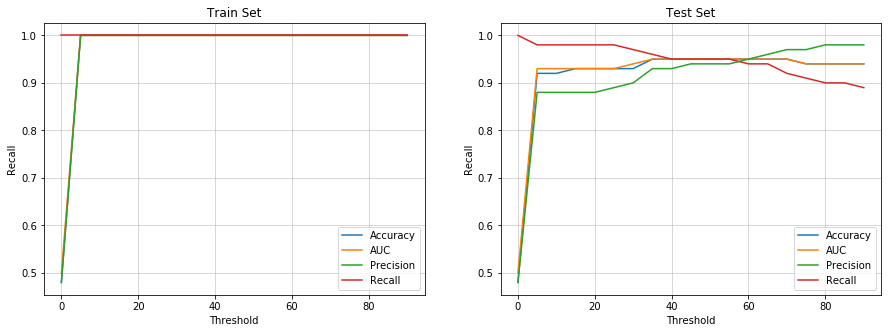

In [262]:
modelPerf_knn = pd.DataFrame(columns=['Threshold', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, recall, auc, df = EvaluateModel(knn_model_cv, X_train[top35Features], y_train, i)
    modelPerf_knn.loc[modelPerf_knn.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(knn_model_cv, X_test[top35Features], y_test, i)
    modelPerf_knn.loc[modelPerf_knn.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
    
PlotScore(modelPerf_knn, 'Threshold')

In [142]:
customprint('**Training Data Score**')
dt_train_df = EvaluateModel(knn_model_cv, X_train[top35Features], y_train, 55, True, True)

customprint('**Testing Data Score**')
dt_test_df = EvaluateModel(knn_model_cv, X_test[top35Features], y_test, 55, True,True)

**Training Data Score**

*********  55  ***********
Accuracy :  1.0
Sensitivity / Recall :  1.0
Precision :  1.0
ROC - AUC :  1.0


**Testing Data Score**

*********  55  ***********
Accuracy :  0.95
Sensitivity / Recall :  0.95
Precision :  0.94
ROC - AUC :  0.95


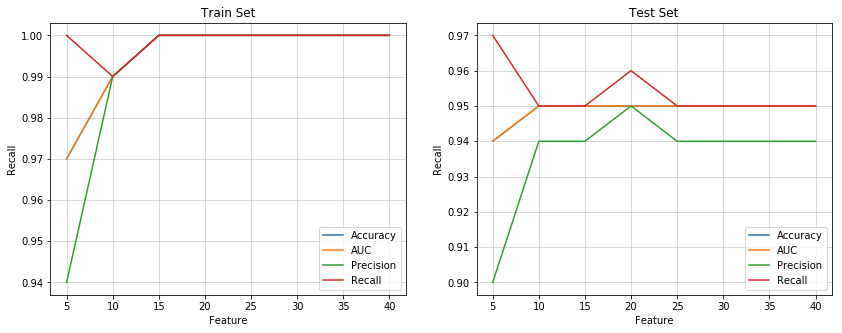

In [254]:
knn = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
knn_model_result = pd.DataFrame(columns=['Feature', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])

for i in range(5,X_train.columns.size,5):
    topFeatures = X_train.columns[reliefF.top_features_[:i]]
    knn.fit(X_train[topFeatures], y_train)
    accuracy, precision, recall, auc, df = EvaluateModel(knn, X_train[topFeatures], y_train, 55, True)
    knn_model_result.loc[knn_model_result.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(knn, X_test[topFeatures], y_test, 55, True)
    knn_model_result.loc[knn_model_result.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
    
PlotScore(knn_model_result)

In [295]:
topFeatures = X_train.columns[reliefF.top_features_[:20]]
finalKNN = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
finalKNN.fit(X_train[topFeatures], y_train)

customprint('**Evaluate KNeighborsClassifier Model Using 20 Features**')

customprint('**Training Data Score**')
knn_train_df = EvaluateModel(finalKNN, X_train[topFeatures], y_train, 55, True, True)

customprint('**Testing Data Score**')
knn_test_df = EvaluateModel(finalKNN, X_test[topFeatures], y_test, 55, True,True)

**Evaluate KNeighborsClassifier Model Using 20 Features**

**Training Data Score**

*********  0.55  ***********
Accuracy :  1.0
Sensitivity / Recall :  1.0
Precision :  1.0
ROC - AUC :  1.0


**Testing Data Score**

*********  0.55  ***********
Accuracy :  0.95
Sensitivity / Recall :  0.96
Precision :  0.95
ROC - AUC :  0.95


**Random Forest**

In [153]:
#Randon Forest using top 35 features
rf = RandomForestClassifier(random_state=100, class_weight='balanced')
param = {
            'n_estimators' : [50,100,150],
            'max_depth': [5,10,15],
            #'max_features': [35,40,45],
            'min_samples_leaf': [30,50,100],
            'min_samples_split': [20,50,100]
        }
rf_model_cv = GridSearchCV(rf, param_grid=param, scoring='precision', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
rf_model_cv.fit(X_train[top35Features], y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                

In [154]:
print("Random Forest Score:", rf_model_cv.best_score_)
rf_model_cv.best_params_

Random Forest Score: 0.9452732239928303


{'max_depth': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 100}

{'max_depth': 10,
 'max_features': 40,
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 30}

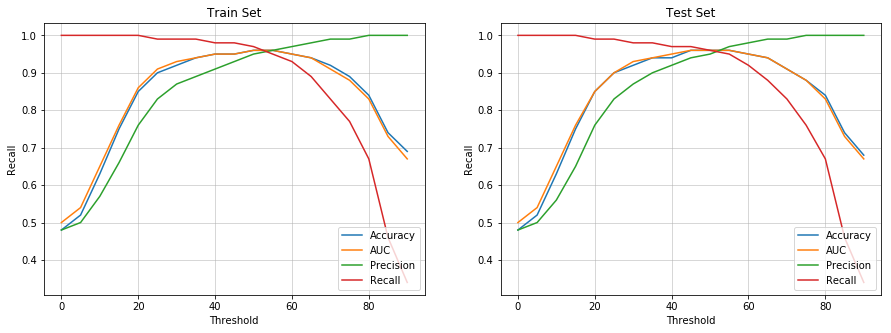

In [263]:
modelPerf_rf = pd.DataFrame(columns=['Threshold', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, recall, auc, df = EvaluateModel(rf_model_cv, X_train[top35Features], y_train, i)
    modelPerf_rf.loc[modelPerf_rf.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(rf_model_cv, X_test[top35Features], y_test, i)
    modelPerf_rf.loc[modelPerf_rf.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
    
PlotScore(modelPerf_rf, 'Threshold')

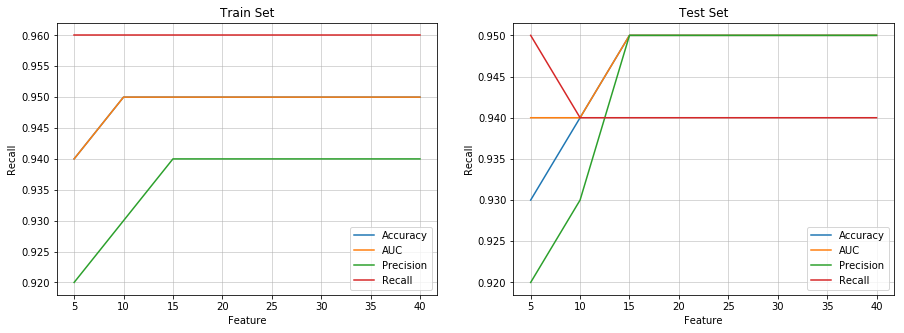

In [264]:
rf_model_result = pd.DataFrame(columns=['Feature', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(5,X_train.columns.size,5):
    topFeatures = X_train.columns[reliefF.top_features_[:i]]
    rf = RandomForestClassifier(random_state=100, class_weight='balanced', 
                            max_depth=5, max_features=i, min_samples_leaf=30, min_samples_split=20, 
                            n_estimators=100)
    rf.fit(X_train[topFeatures], y_train)
       
    accuracy, precision, recall, auc, df = EvaluateModel(rf, X_train[topFeatures], y_train, 55)
    rf_model_result.loc[rf_model_result.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(rf, X_test[topFeatures], y_test, 55)
    rf_model_result.loc[rf_model_result.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
     
PlotScore(rf_model_result, 'Feature')

In [296]:
topFeatures = X_train.columns[reliefF.top_features_[:15]]
finalRF = RandomForestClassifier(random_state=100, class_weight='balanced', 
                            max_depth=5, max_features=15, min_samples_leaf=30, min_samples_split=20, 
                            n_estimators=100)
finalRF.fit(X_train[topFeatures], y_train)

customprint('**Evaluate Random Forest Model Using 15 Features**')

customprint('**Training Data Score**')
rf_train_df = EvaluateModel(finalRF, X_train[topFeatures], y_train, 55, True, True)

customprint('**Testing Data Score**')
rf_test_df = EvaluateModel(finalRF, X_test[topFeatures], y_test, 55, True, True)

**Evaluate Random Forest Model Using 15 Features**

**Training Data Score**

*********  0.55  ***********
Accuracy :  0.95
Sensitivity / Recall :  0.96
Precision :  0.94
ROC - AUC :  0.95


**Testing Data Score**

*********  0.55  ***********
Accuracy :  0.95
Sensitivity / Recall :  0.94
Precision :  0.95
ROC - AUC :  0.95


**XGB Classifier**

In [267]:
#Randon Forest using top 45 features
xgb = XGBClassifier(seed=100, random_state=100, booster='gbtree')
param = {
            'min_child_weight' : [5,10],
            'gamma' : [0.2,0.3,0.4],
            'subsample' : [0.75,0.8,0.9],
            'colsample_bytree' : [0.7,0.8,0.9],
            'n_estimators' : [50,100,200],
            'learning_rate' : [0.1, 0.05],
            'max_depth': [10,15,20]
        }
xgb_model_cv = GridSearchCV(xgb, param_grid=param, scoring='precision', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
xgb_model_cv.fit(X_train[top35Features], y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 43.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 66.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, obje...
                                     reg_lambda=1, scale_pos_weight=1, seed=100,
                                     silent=None, subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0.2, 0.3, 0.4], 'learning_rate': [0.1, 0.05],
                         'max_depth': [10, 


{'colsample_bytree': 0.9,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.75}

In [271]:
print(xgb_model_cv.best_score_)
xgb_model_cv.best_params_

0.9787287799126615


{'colsample_bytree': 0.9,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 15,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.75}

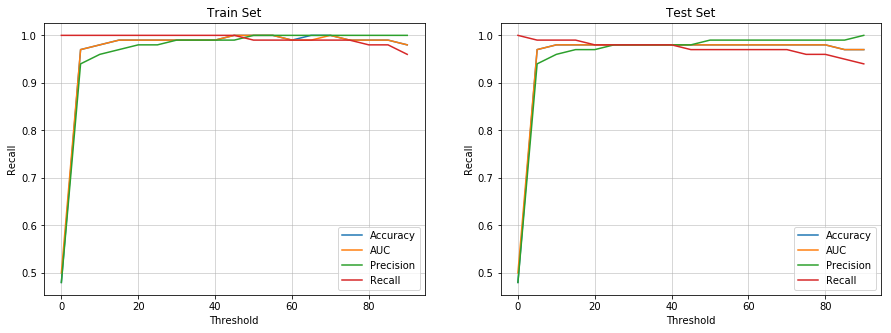

In [272]:
modelPerf_xgb = pd.DataFrame(columns=['Threshold', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, recall, auc, df = EvaluateModel(xgb_model_cv, X_train[top35Features], y_train, i)
    modelPerf_xgb.loc[modelPerf_xgb.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(xgb_model_cv, X_test[top35Features], y_test, i)
    modelPerf_xgb.loc[modelPerf_xgb.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
    
PlotScore(modelPerf_xgb, 'Threshold')

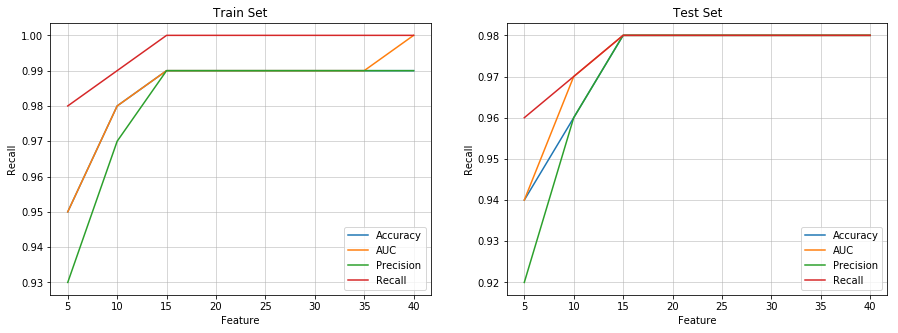

In [276]:
xgb_model_result = pd.DataFrame(columns=['Feature', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
xgb = XGBClassifier(seed=100, random_state=100, booster='gbtree',
                    colsample_bytree= 0.9, 
                    gamma= 0.4,
                    learning_rate= 0.1,
                    max_depth= 15,
                    min_child_weight= 5,
                    n_estimators= 200,
                    subsample=0.75)

for i in range(5,X_train.columns.size,5):
    topFeatures = X_train.columns[reliefF.top_features_[:i]]
    xgb.fit(X_train[topFeatures], y_train)
       
    accuracy, precision, recall, auc, df = EvaluateModel(xgb, X_train[topFeatures], y_train, 40)
    xgb_model_result.loc[xgb_model_result.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(xgb, X_test[topFeatures], y_test, 40)
    xgb_model_result.loc[xgb_model_result.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
     
PlotScore(xgb_model_result, 'Feature')

In [297]:
topFeatures = X_train.columns[reliefF.top_features_[:15]]
finalXGB = XGBClassifier(seed=100, random_state=100, booster='gbtree',
                    colsample_bytree= 0.9, 
                    gamma= 0.4,
                    learning_rate= 0.1,
                    max_depth= 15,
                    min_child_weight= 5,
                    n_estimators= 200,
                    subsample=0.75)
finalXGB.fit(X_train[topFeatures], y_train)

customprint('**Evaluate XGB Calssifier Model Using  Feature**')
customprint('**Training Data Score**')
xgb_train_df = EvaluateModel(finalXGB, X_train[topFeatures], y_train, 40, True, True)

customprint('**Testing Data Score**')
xgb_test_df = EvaluateModel(finalXGB, X_test[topFeatures], y_test, 40, True, True)

**Evaluate XGB Calssifier Model Using  Feature**

**Training Data Score**

*********  0.4  ***********
Accuracy :  0.99
Sensitivity / Recall :  1.0
Precision :  0.99
ROC - AUC :  0.99


**Testing Data Score**

*********  0.4  ***********
Accuracy :  0.98
Sensitivity / Recall :  0.98
Precision :  0.98
ROC - AUC :  0.98


**Creating new dataset for Stacking using test data predicted probability**

In [314]:
stckedDf = pd.DataFrame(columns=['KNN', 'RF', 'XGB'])
stckedDf['KNN'] = knn_test_df['Phished_Prob']
stckedDf['RF'] = rf_test_df['Phished_Prob']
stckedDf['XGB'] = xgb_test_df['Phished_Prob']
stckedDf['Phished'] = xgb_test_df['Phished']
stckedDf.head()

,KNN,RF,XGB,Phished
1916,1.0,0.995176,0.999614,1
1237,1.0,0.987273,0.998354,1
2653,1.0,0.994358,0.999707,1
2654,1.0,0.964692,0.988193,1
2655,1.0,0.903549,0.993735,1


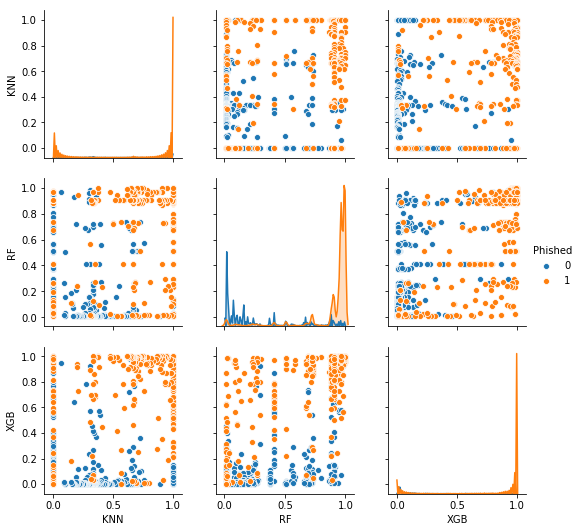

In [322]:
sns.pairplot(stckedDf,x_vars=['KNN','RF','XGB'],y_vars=['KNN','RF','XGB'], hue='Phished')
plt.show()

In [337]:
X_stack = stckedDf.drop(columns='Phished')
Y_stack = stckedDf['Phished']
X_stack_train, X_stack_test, y_stack_train, y_stack_test = train_test_split(X_stack, Y_stack, train_size=0.6, random_state=100, stratify = Y_stack)

In [371]:
lr = LogisticRegression(random_state=100)
param = {'C' : [1000,100,10,1,0.1]}
lr_model_cv = GridSearchCV(lr, param_grid=param, scoring='precision', cv=folds, n_jobs=-1, verbose=1, return_train_score=True)
lr_model_cv.fit(X_stack_train, y_stack_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'C': [1000, 100, 10, 1, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='precision', verbose=1)

In [372]:
print(lr_model_cv.best_score_)
lr_model_cv.best_params_

0.986169819751651


{'C': 100}

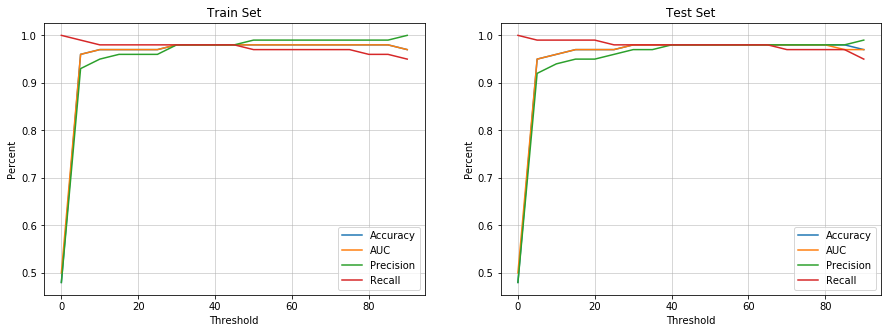

In [374]:
lr = LogisticRegression(random_state=100, C=100)
lr.fit(X_stack_train, y_stack_train)
modelPerf_lr = pd.DataFrame(columns=['Threshold', 'DataSet', 'Accuracy', 'Precision', 'Recall', 'AUC'])
for i in range(0, 91, 5):
    accuracy, precision, recall, auc, df = EvaluateModel(lr, X_stack_train, y_stack_train, i)
    modelPerf_lr.loc[modelPerf_lr.shape[0]] = [i, 'Train', accuracy, precision, recall, auc]
    
    accuracy, precision, recall, auc, df = EvaluateModel(lr,  X_stack_test, y_stack_test, i)
    modelPerf_lr.loc[modelPerf_lr.shape[0]] = [i, 'Test', accuracy, precision, recall, auc]
    
PlotScore(modelPerf_lr, 'Threshold')

In [380]:
customprint('**Meta Classifier - Logistic Regression Model **')

customprint('**Training Data Score**')
lr_train_df = EvaluateModel(lr, X_stack_train, y_stack_train, 40, True, True)

customprint('**Testing Data Score**')
lr_test_df = EvaluateModel(lr, X_stack_test, y_stack_test, 40, True, True)

**Meta Classifier - Logistic Regression Model **

**Training Data Score**

*********  0.4  ***********
Accuracy :  0.98
Sensitivity / Recall :  0.98
Precision :  0.98
ROC - AUC :  0.98


**Testing Data Score**

*********  0.4  ***********
Accuracy :  0.98
Sensitivity / Recall :  0.98
Precision :  0.98
ROC - AUC :  0.98
